<a href="https://colab.research.google.com/github/MTxSouza/Supermarket-Sales-Data-Analysis/blob/main/pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d aungpyaeap/supermarket-sales
!unzip supermarket-sales.zip -d dataset/
!rm -rf supermarket-sales.zip

  0% 0.00/35.9k [00:00<?, ?B/s]
100% 35.9k/35.9k [00:00<00:00, 53.6MB/s]
Archive:  supermarket-sales.zip
  inflating: dataset/supermarket_sales - Sheet1.csv  


# Notebook setup

### Imports

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Analysis

In [83]:
df = pd.read_csv('/content/dataset/supermarket_sales - Sheet1.csv')

In [84]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [85]:
# Checking if there is any NaN
# value and the type of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

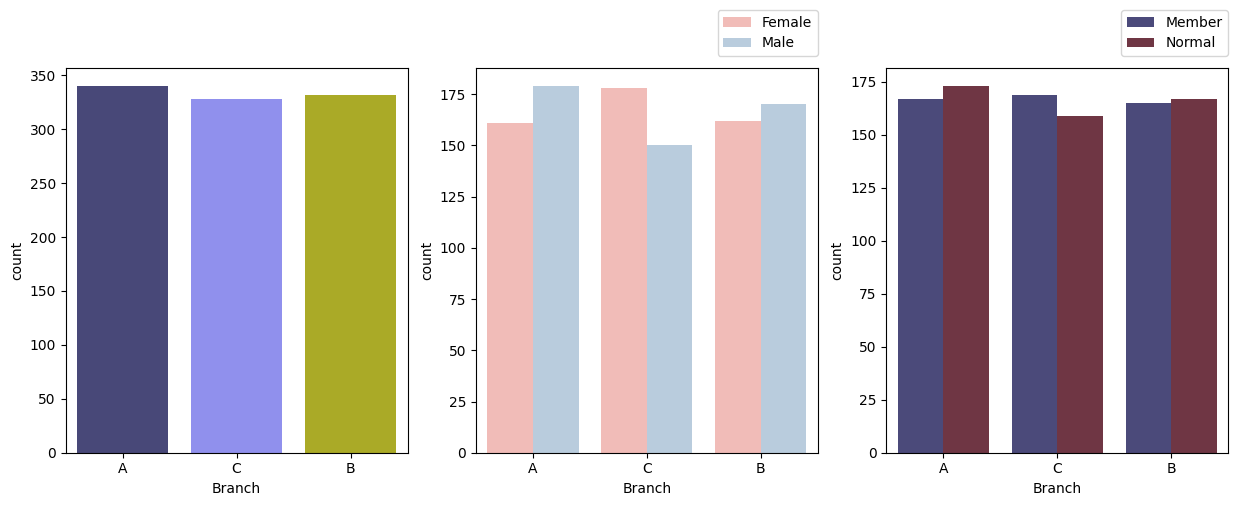

In [104]:
# Checking number of purchage for
# each branch
fig, ax = plt.subplots(ncols=3, figsize=(15,5))

sns.countplot(data=df, x='Branch', palette='gist_stern', ax=ax[0])

sns.countplot(data=df, x='Branch', hue='Gender', palette='Pastel1', ax=ax[1])
ax[1].legend(bbox_to_anchor=(1, 1.15), loc='upper right', borderaxespad=0)

sns.countplot(data=df, x='Branch', hue='Customer type', palette='icefire', ax=ax[2])
ax[2].legend(bbox_to_anchor=(1, 1.15), loc='upper right', borderaxespad=0)

plt.show()
# --------------------------------------------------
# The number of branchs and its customers looks like
# well distribuited for analysis, and it seens that
# branch A has more products for male public and C
# for female

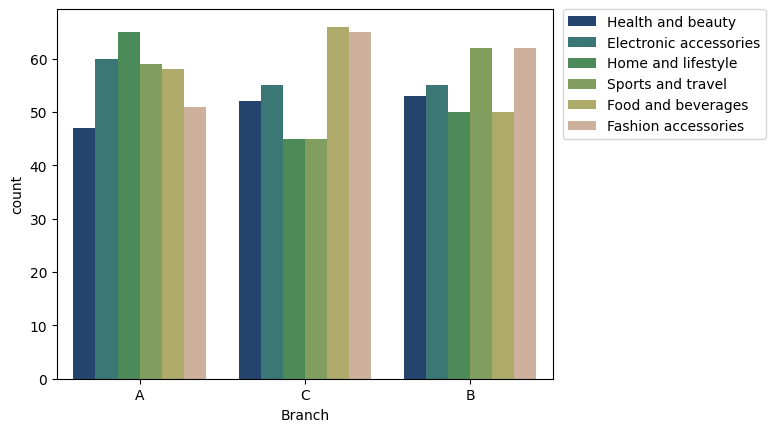

In [87]:
# Checking type of product of each
# branch
sns.countplot(data=df, x='Branch', hue='Product line', palette='gist_earth')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
# --------------------------------------------------
# Analysing this graph we can see that the reason why
# A sells more products for male public and C for female
# is probably because A sells more electronic, home products
# and sports items, which is more commom male public to
# buy, whereas branch C sells more fashion items and food
# stuffs as well, more likely to be for female public

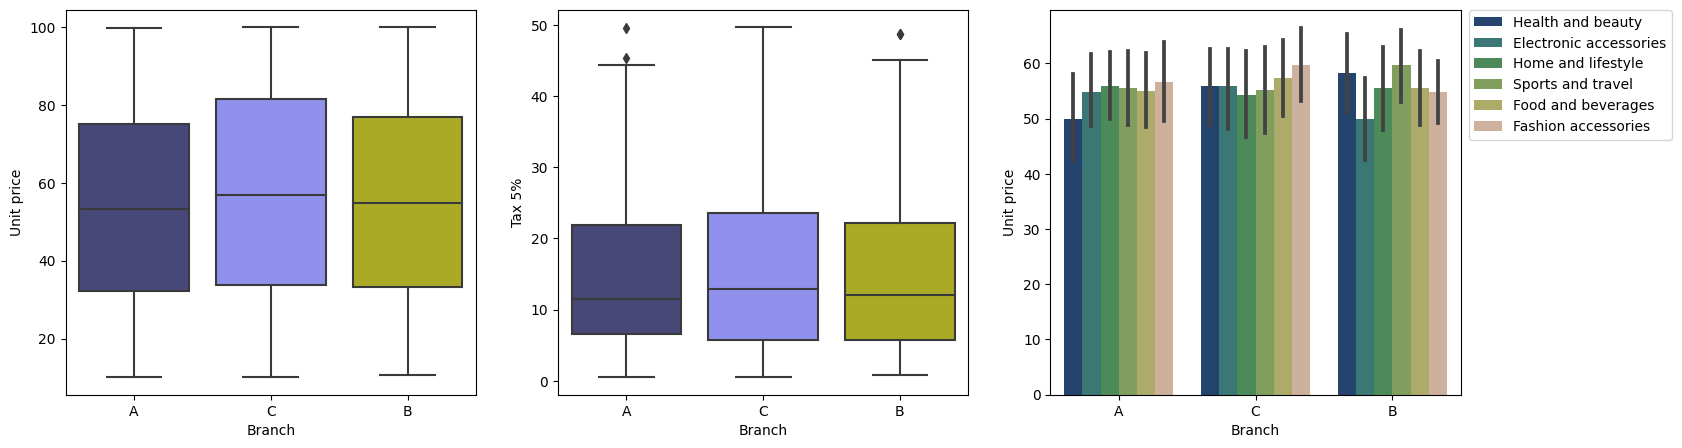

In [107]:
# Checking price of products for each
# brach and its taxes
fig, ax = plt.subplots(ncols=3, figsize=(18,5))
sns.boxplot(data=df, x='Branch', y='Unit price', palette='gist_stern', ax=ax[0])
sns.boxplot(data=df, x='Branch', y='Tax 5%', palette='gist_stern', ax=ax[1])
sns.barplot(data=df, x='Branch', y='Unit price', hue='Product line', palette='gist_earth', ax=ax[2])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
# --------------------------------------------------
# Even each branch has a especific type of product,
# all of them sell their product with a similiar
# price and the distribuiton of prices seens to be
# equally distribuited, but I see that some products
# has a high tax than other because of the product
# price

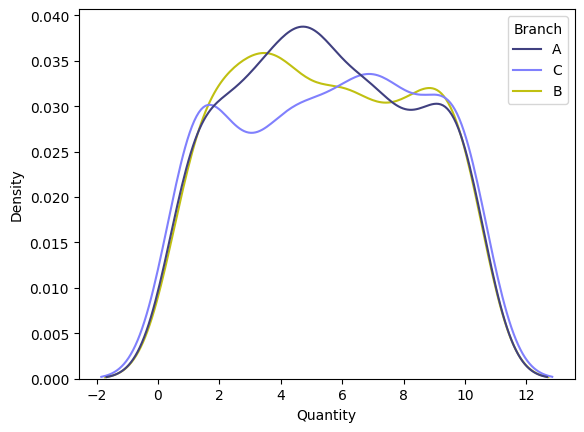

In [89]:
# Checking how much products each branch
# sell per purchase
sns.kdeplot(data=df, x='Quantity', hue='Branch', palette='gist_stern')
plt.show()
# --------------------------------------------------
# I see that all branchs has almost the same quantity
# of product selled for purchase, with a slight peak
# in some different regions for each branch

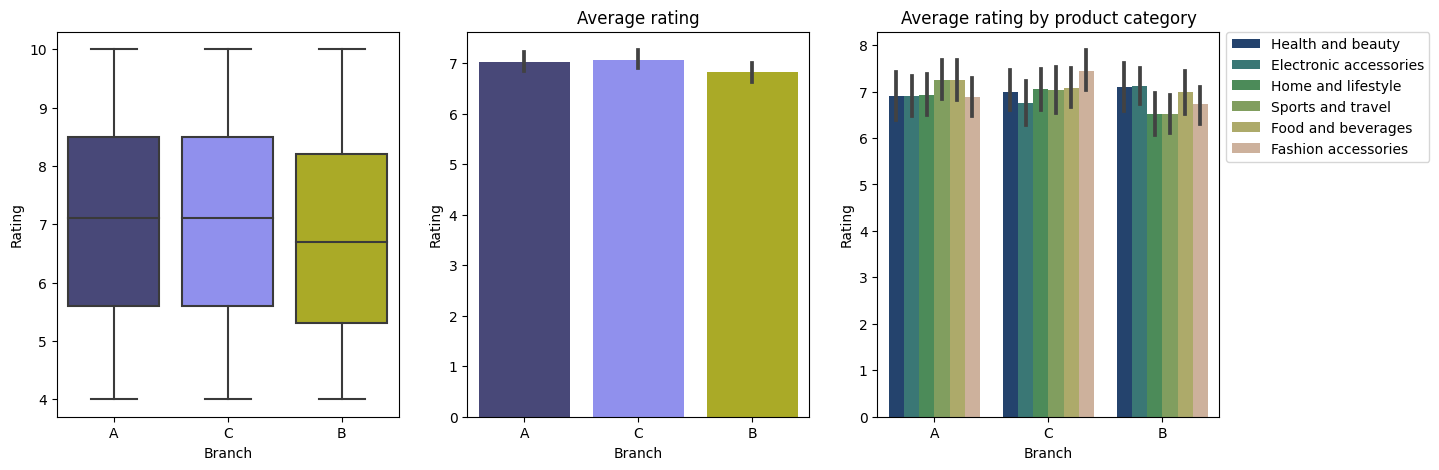

In [111]:
# Checking rating of each brach
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
sns.boxplot(data=df, x='Branch', y='Rating', palette='gist_stern', ax=ax[0])

ax[1].set_title(label='Average rating')
sns.barplot(data=df, x='Branch', y='Rating', palette='gist_stern', ax=ax[1])

ax[2].set_title(label='Average rating by product category')
sns.barplot(data=df, x='Branch', y='Rating', hue='Product line', palette='gist_earth', ax=ax[2])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.show()
# --------------------------------------------------
# It is interesting see that even a especific branch
# has more purchase in a especific category, it does
# not mean that it product is better than other branchs,
# for example, branch B has a average rating in `sports
# and travel` category lower than A and C, but in above
# graph we see that B sells more product like it than
# others, maybe it is because the `sports and travel`
# products in B is more expencive than other, so maybe
# it justify the low rating compared to A and C

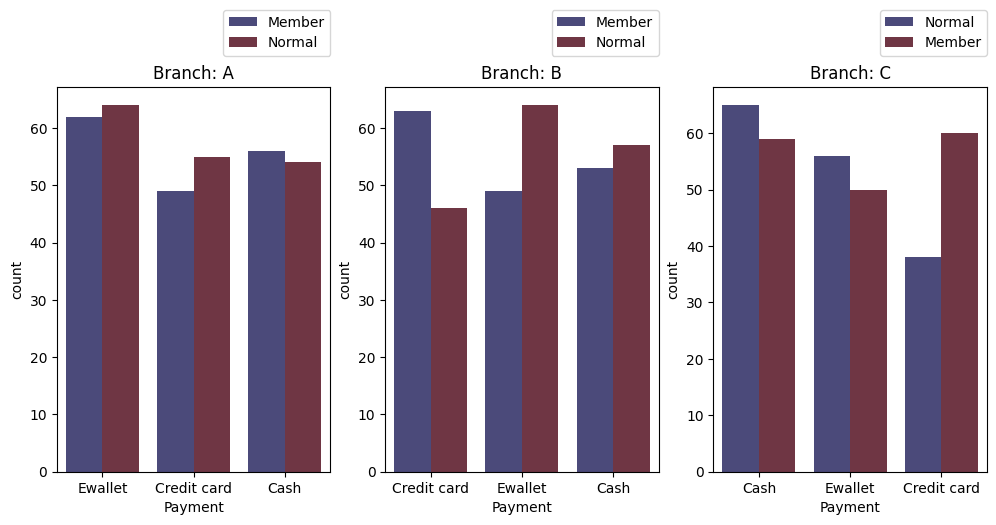

In [91]:
# Checking payment method for each
# branch and its costumers
fig, ax = plt.subplots(ncols=3, figsize=(12,5))
for index, branch in enumerate(['A', 'B', 'C']):
    ax[index].set_title(label=f'Branch: {branch}')
    sns.countplot(data=df[df['Branch'] == branch], x='Payment', hue='Customer type', palette='icefire', ax=ax[index])
    ax[index].legend(bbox_to_anchor=(1, 1.2), loc='upper right', borderaxespad=0)
plt.show()
# --------------------------------------------------
# There is a slight difference in payment method for
# each costumer in each branch

In [92]:
# Checking most purchase days for
# each branch
if df['Date'].dtype == 'O':
    df['Date'] = df['Date'].map(pd.to_datetime)
if df['Time'].dtype == 'O':
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour

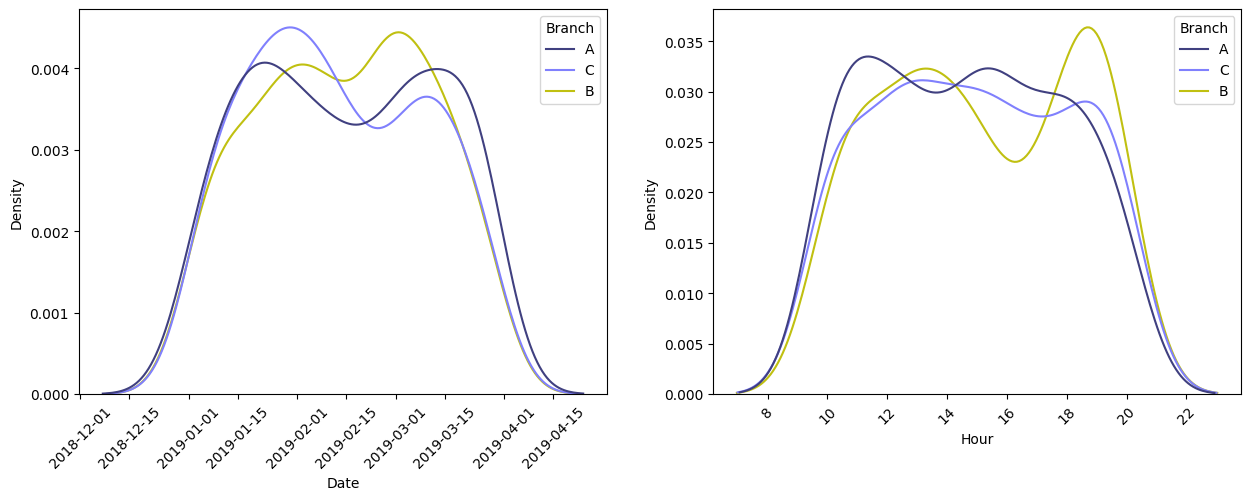

In [96]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

sns.kdeplot(data=df, x='Date', hue='Branch', palette='gist_stern', ax=ax[0])
ax[0].set_xticklabels(labels=ax[0].get_xticklabels(), rotation=45)

sns.kdeplot(data=df, x='Time', hue='Branch', palette='gist_stern', ax=ax[1])
ax[1].set_xticklabels(labels=ax[1].get_xticklabels(), rotation=45)
ax[1].set_xlabel(xlabel='Hour')

plt.show()
# --------------------------------------------------
# All branchs looks like have a similar behavior related
# to its sells in an especific date

In [118]:
# Chrecking correlation between price of
# product, tax and it rating
corr = df[['Unit price', 'Tax 5%', 'Rating']].corr()

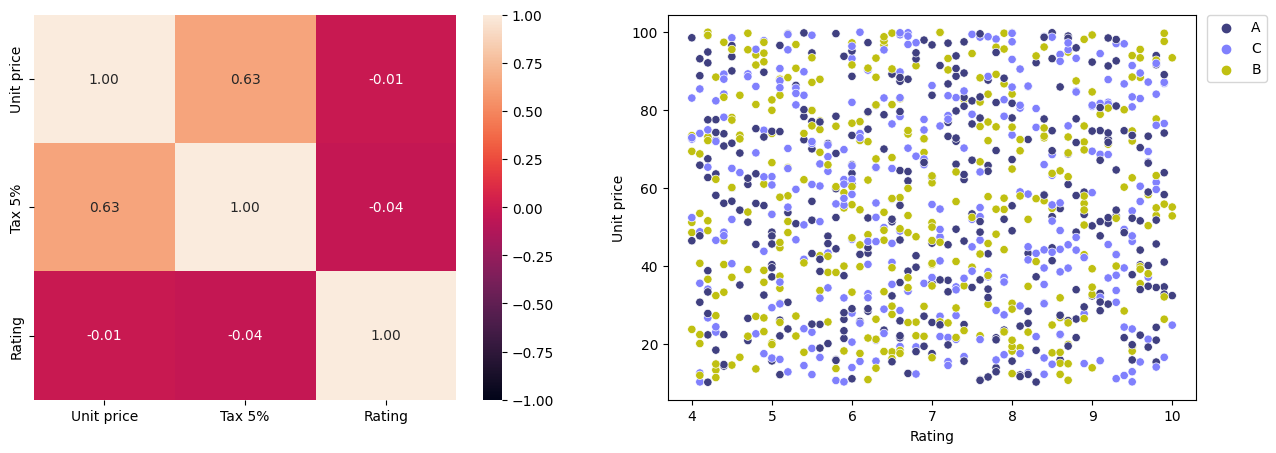

In [121]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.heatmap(data=corr, annot=True, fmt='.2f', vmin=-1, vmax=1, ax=ax[0])
sns.scatterplot(data=df, x='Rating', y='Unit price', hue='Branch', palette='gist_stern', ax=ax[1])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
# --------------------------------------------------
# There is no correlation between the price of product
# and it tax to the final product rating, maybe the
# quality of product and time of deliver could influence
# this variable but it is an information not available
# in dataset unfortunately

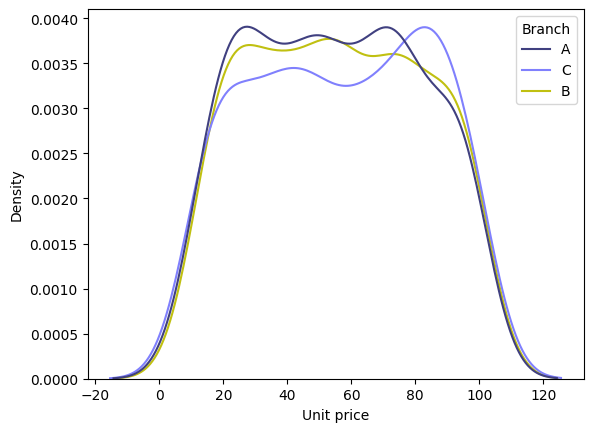

In [123]:
# Checking distribution of prices in
# each branch
sns.kdeplot(data=df, x='Unit price', hue='Branch', palette='gist_stern')
plt.show()
# --------------------------------------------------
# Branch C looks like have more expencive products than
# others, while branch A and B are realy similar in their
# distribution of prices